<a href="https://colab.research.google.com/github/gabriellbragaa/Vis-o_Computacional/blob/main/Lab03resolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)
Para cada uma das imagens fornecidas:

• Analise e aplique filtros tanto no domínio do espaço quanto da frequência, de forma a remover (ou reduzir) o ruído presente nas imagens.

• Compare e explique os resultados, descrevendo o raciocínio que o levou usar cada
um dos filtros aplicados.

**spatial_filter.py:** Filtro espaciais, Utilizado para reduzir ruídos, como filtro de média ou mediana. Ou seja, filtro de mediana e média.

**fft_filter.py:** Filtros no domínio de frequência, utiliza transformada rápida de Fourier (FFT) para analisar a imagem e remover componentes de alta frequência (ruído) ou baixa frequência. O algoritmo em si, demonstra o uso do FFT.
Ou seja, remove ruído ded alta frequência.

**filter_responser.py:** O algoritmo analisa a resposta de diferentes filtros, interessante para entender como cada filtro afeta a imagem e o ruído.

Saving fg.jpg to fg (6).jpg


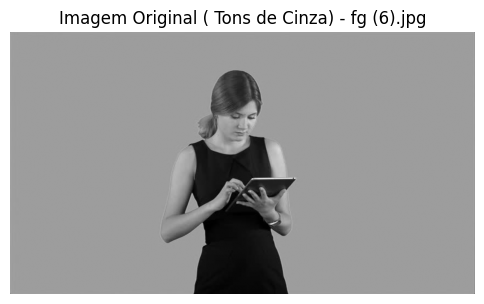

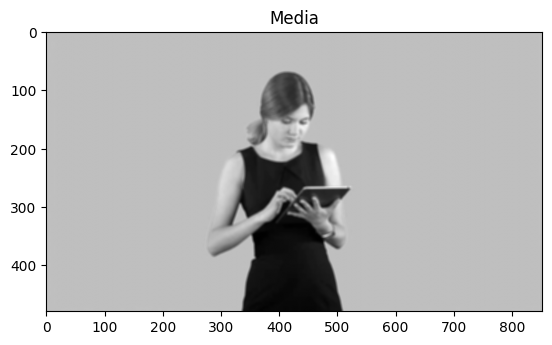

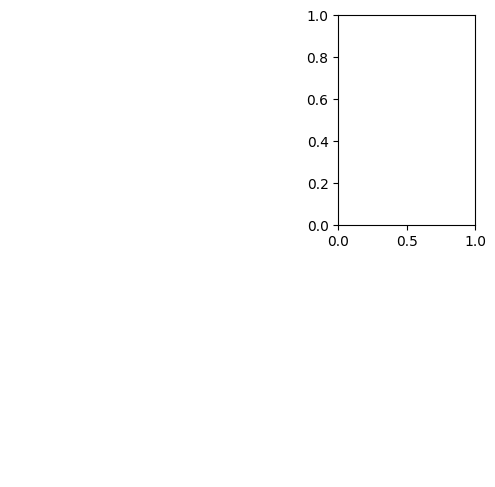

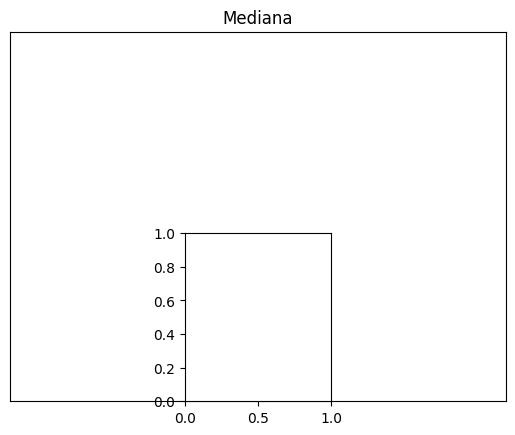

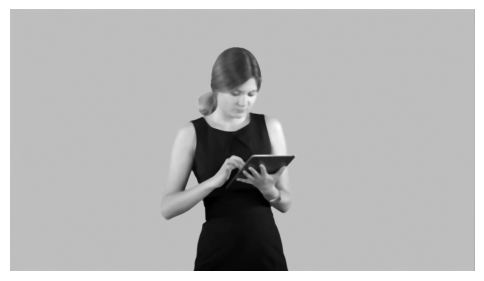

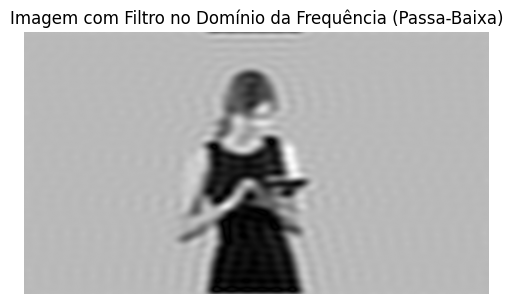

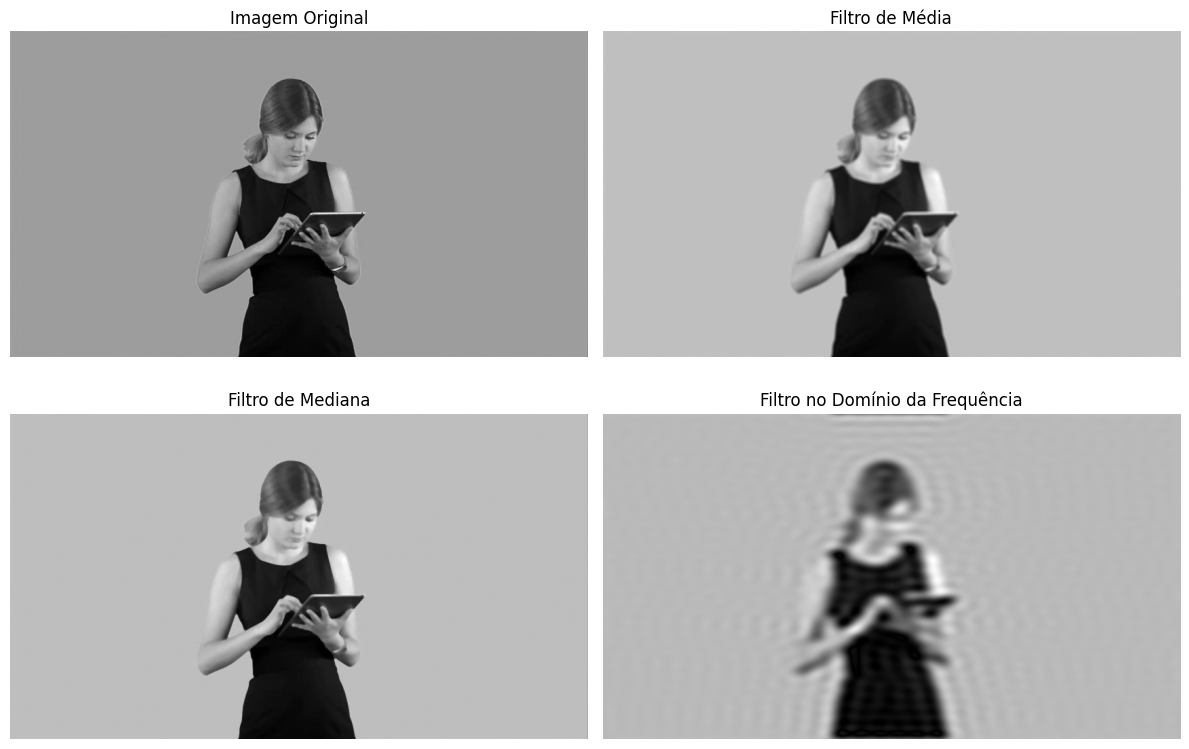

In [ ]:
# Instalar e importar as bibliotecas necessárias:
!pip install opencv-python numpy matplotlib
# opencv-python
# essencial para manipulação de imagens

import cv2
import numpy as np # operações numéricas
import matplotlib.pyplot as plt # para vizualização


# importar a imagem
# clique em escolher arquivos
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  img_colorida = cv2.imread(filename)
  img = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2GRAY)

  plt.figure(figsize=(6, 6))
  plt.imshow(img, cmap='gray')
  plt.title(f'Imagem Original ( Tons de Cinza) - {filename}')
  plt.axis('off')
  plt.show()

# ************** Aplicar os filtros ***********************

# Filtro da média
img_media = avg_blur = cv2.blur(img,(5,5))


plt.imshow(img_media,cmap = 'gray')
plt.title('Media')
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.subplot(233)
plt.show()

# Filtro da mediana
img_mediana = cv2.medianBlur(img,5)

plt.title('Mediana')
plt.xticks([])
plt.yticks([])
plt.subplot(235)
plt.figure(figsize=(6, 6))
plt.imshow(img_mediana, cmap='gray')
plt.axis('off')
plt.show()

# Filtro Dominio de frequencia

## Sendo um array para o eixo real e outro para o imaginario
## A imagem precisa ser float
## Aplicar a Transformada de Fourier

a = np.fft.fft2(img)
img_fft = np.fft.fftshift(a)

# Mascara redimensionada, valores movidos para o centro
l, c = img.shape
cl, cc = l // 2, c // 2
filter_mask = np.zeros((l, c))
filter_mask[cl - 10:cl + 10, cc - 10:cc + 10] = 1

# Raio do filtro

raio = 30
centro = [cl, cc]
x, y = np.ogrid[:l, :c]
mask_area = (x - centro[0]) ** 2 + (y - centro[1]) ** 2 <= raio ** 2
filter_mask[mask_area] = 1

# Aplicar o filtro

img_fft_filtered = img_fft * filter_mask
fft_filtered = np.fft.ifftshift(img_fft_filtered)
img_frequencia = np.fft.ifft2(fft_filtered)
img_frequencia = np.abs(img_frequencia).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(img_frequencia, cmap='gray')
plt.title('Imagem com Filtro no Domínio da Frequência (Passa-Baixa)')
plt.axis('off')
plt.show()

# Comparando e vizualizando os resultados

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_media, cmap='gray')
plt.title('Filtro de Média')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_mediana, cmap='gray')
plt.title('Filtro de Mediana')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_frequencia, cmap='gray')
plt.title('Filtro no Domínio da Frequência')
plt.axis('off')

plt.tight_layout()
plt.show()



02. Escolha uma imagem qualquer colorida e aplique um ou mais filtros convolucionais, de
forma a resultar em uma imagem em tons de cinza.

Filtro de Acentuação ( **Sharpening Filter** ): Responsável por realçar as bordas e os detalhes da imagem, tornando ela mais nitida. Frequentemente, ela subtrai uma versão suavizada da imagem original.

 **Kernel de Acentuação** é uma pequena matriz (ou template) usada em operações de convolução em processamento de imagem para realçar as bordas e os detalhes, tornando a imagem mais nítida. Quando um **kernel de acentuação** é aplicado a uma imagem por convolução, o kernel desliza sobre a imagem pixel por pixel. Para cada posição, os valores do kernel são *multiplicados* pelos valores dos pixels correspondentes na área sob o kernel, e **os resultados são somados para obter o novo valor do pixel central**.

Saving fg.jpg to fg (15).jpg


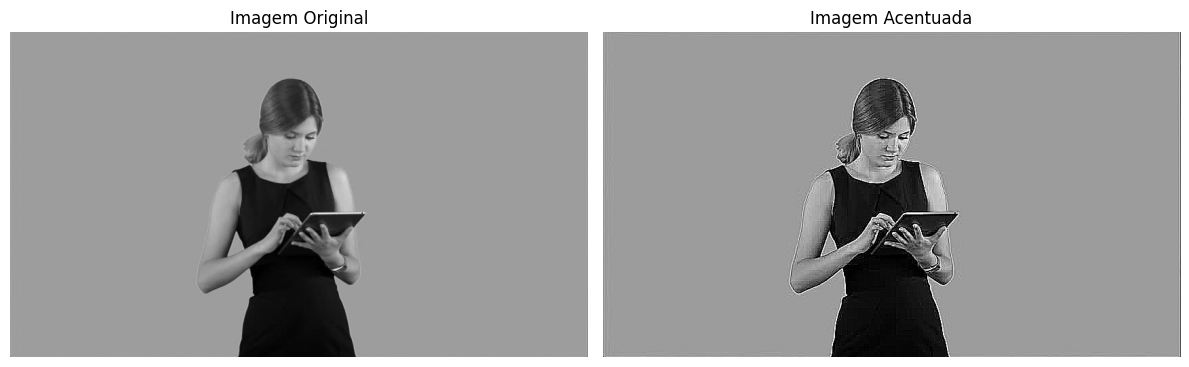

In [ ]:
!pip install opencv-python numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  img_colorida = cv2.imread(filename)
  img = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2GRAY)

# Temos que difinir um kernel de acentuação

kernel_sha = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])


# Aplicaremos a Convolução com o kernel de acentuação
# Aplicamos cv2.filter2D para aolicar o kernel a imagem
imagem_sharpened = cv2.filter2D(img, -1, kernel_sha)

# exibir a imagem original e a acentuada

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_sharpened, cmap='gray')
plt.title('Imagem Acentuada')
plt.axis('off')

plt.tight_layout()
plt.show()

**Filtro laplaciano** : Este filtro detecta bordas com base na segunda derivada da intensidade dos pixers. É usado para realçar as bordas e detectar cantos.

Saving fg.jpg to fg (18).jpg


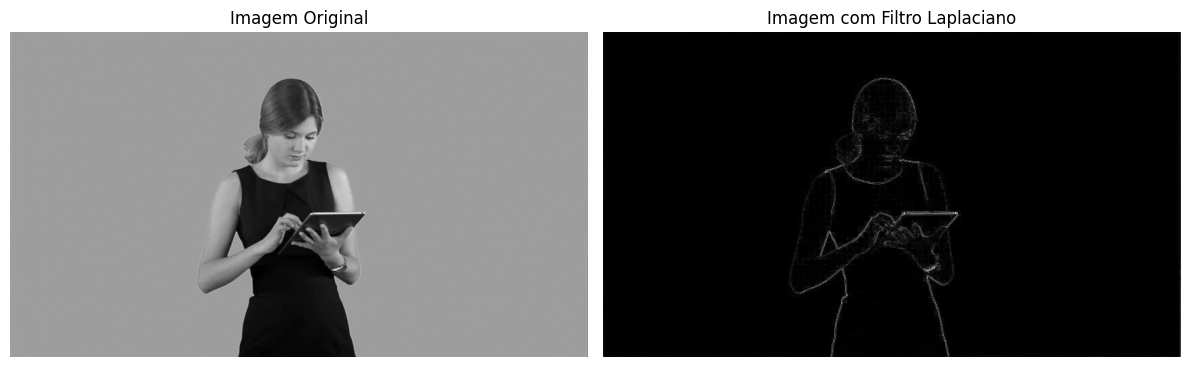

In [ ]:
!pip install opencv-python numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  img_colorida = cv2.imread(filename)
  img = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2GRAY)


# cv2.CV_64F evita o truncamento de derivadas negativas
imagem_laplaciana = cv2.Laplacian(img, cv2.CV_64F)

# Converter para o tipo de dados uint8 e calcular o valor absoluto
# Isso é necessário porque o Laplaciano pode produzir valores negativos e maiores que 255.
# cv2.CV_64F Armazena os resultados Laplacianos e garante que seja armazenados em um tipo de dado que pode lidar com valores negativos.

abs_laplacian = cv2.convertScaleAbs(imagem_laplaciana)



plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(abs_laplacian, cmap='gray')
plt.title('Imagem com Filtro Laplaciano')
plt.axis('off')

plt.tight_layout()
plt.show()




03. Repita a questão anterior, mas dessa vez a imagem resultante deve ter uma coloração
sépia.

**Coloração Sépia:** A **coloração sépia** é feita aplicando uma t*ransformação nos canais de co*r da imagem em tons de cinza.  Você cria uma nova imagem colorida onde os valores dos canais R, G e B são calculados a partir do valor do pixel em tons de cinza usando coeficientes específicos.

Saving fg.jpg to fg (5).jpg


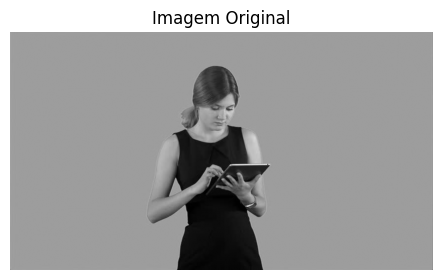

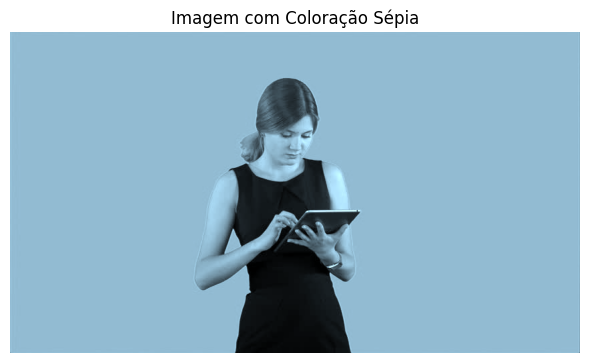

In [ ]:
!pip install opencv-python numpy matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  img_colorida = cv2.imread(filename)

# Converter para cinza.
img = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2GRAY)

# Converte para BRG
img_sepia = np.zeros(img_colorida.shape, dtype='uint8')

# Algoritmo de Transformação da Sépia

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        gray_pixel = img[i, j]
        # Calcular os novos valores R, G, B para o pixel em sépia
        b = int(gray_pixel * 0.393 + gray_pixel * 0.769 + gray_pixel * 0.189)
        g = int(gray_pixel * 0.349 + gray_pixel * 0.686 + gray_pixel * 0.168)
        r = int(gray_pixel * 0.272 + gray_pixel * 0.534 + gray_pixel * 0.131)

        # Limitar os valores a 255
        img_sepia[i, j, 0] = min(b, 255) # Canal Azul (BGR)
        img_sepia[i, j, 1] = min(g, 255) # Canal Verde (BGR)
        img_sepia[i, j, 2] = min(r, 255) # Canal Vermelho (BGR)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')



plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_sepia, cv2.COLOR_BGR2RGB)) # Converter para RGB para exibição no Matplotlib
plt.title('Imagem com Coloração Sépia')
plt.axis('off')


plt.tight_layout()
plt.show()
